<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
Missing Data Percentage:
 Patient_ID        0.000000
Age               0.000000
Gender            4.158416
Blood_Pressure    5.940594
Cholesterol       3.960396
Diabetes          0.000000
Heart_Disease     0.000000
dtype: float64


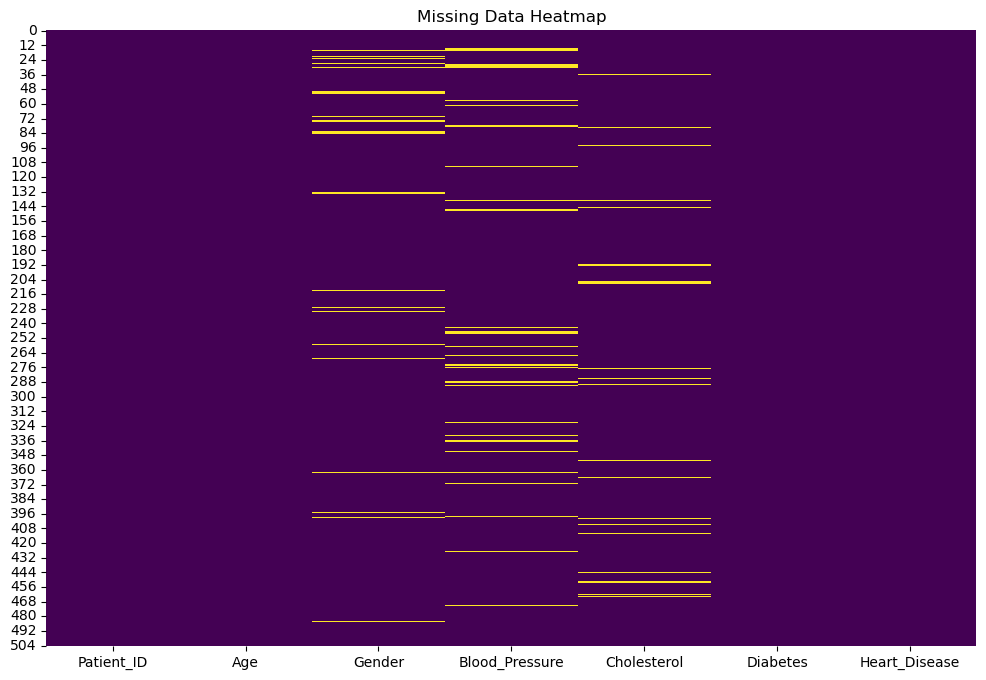

Data Summary Before Imputation:
       Patient_ID         Age      Gender  Blood_Pressure  Cholesterol  \
count  505.000000  505.000000  505.000000      505.000000   505.000000   
mean   249.693069   52.918812    0.546535      133.412632   200.470103   
std    144.240508   21.064700    0.498323       25.149755    57.360715   
min      1.000000   18.000000    0.000000       90.000000   101.000000   
25%    126.000000   34.000000    0.000000      113.000000   151.000000   
50%    249.000000   52.000000    1.000000      133.412632   203.000000   
75%    374.000000   71.000000    1.000000      153.000000   248.000000   
max    500.000000   89.000000    1.000000      179.000000   299.000000   

         Diabetes  Heart_Disease  
count  505.000000     505.000000  
mean     0.196040       0.134653  
std      0.397392       0.341692  
min      0.000000       0.000000  
25%      0.000000       0.000000  
50%      0.000000       0.000000  
75%      0.000000       0.000000  
max      1.000000    

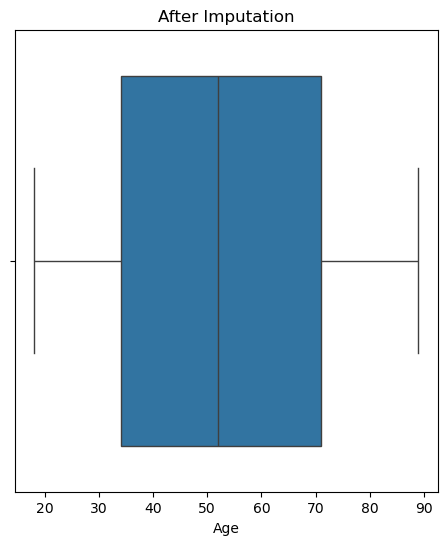

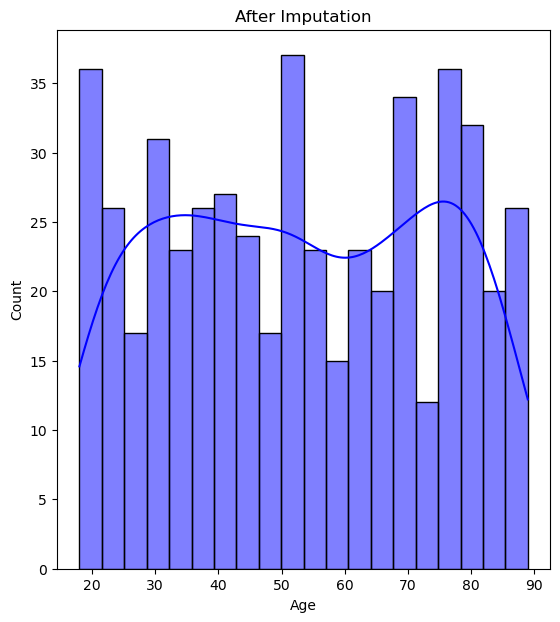

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# 1. **Load Dataset**
df = pd.read_csv('Day_15_Healthcare_Data.csv')

# 2. **Exploratory Data Analysis (EDA)**
df.head()  
df.info()  
df.describe() 

# 3. **Identify Missing Data**
# Check percentage of missing data for each column
missing_percentage = df.isna().sum() / len(df) * 100
print("Missing Data Percentage:\n", missing_percentage)

# Visualize missing data using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 4. **Imputation Techniques**

# 4.1 **Mean/Median/Mode Imputation for Numerical Columns**
df['Age'] = df['Age'].fillna(df['Age'].mean())  
df['Blood_Pressure'] = df['Blood_Pressure'].fillna(df['Blood_Pressure'].mean())  
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].mean()) 

# 4.2 **Mode Imputation for Categorical Columns**
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])  
df['Diabetes'] = df['Diabetes'].fillna(df['Diabetes'].mode()[0])  
df['Heart_Disease'] = df['Heart_Disease'].fillna(df['Heart_Disease'].mode()[0]) 

# 4.3 **K-Nearest Neighbors (KNN) Imputation** (Optional)
# Separate numerical columns for KNN imputation
numerical_columns = df[['Age', 'Blood_Pressure', 'Cholesterol']]

# Apply KNN imputation to numerical columns
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(numerical_columns), columns=numerical_columns.columns)

# Replace the numerical columns in the original dataframe with the imputed ones
df[['Age', 'Blood_Pressure', 'Cholesterol']] = df_imputed_knn

# 4.4 **Encoding Categorical Columns (if you want to use KNN for them too)**

# Label encoding for categorical columns like 'Gender', 'Diabetes', 'Heart_Disease'
label_encoder = LabelEncoder()

# Apply Label Encoding to categorical columns (this will convert strings to numeric labels)
df['Gender'] = label_encoder.fit_transform(df['Gender'].astype(str))
df['Diabetes'] = label_encoder.fit_transform(df['Diabetes'].astype(str))
df['Heart_Disease'] = label_encoder.fit_transform(df['Heart_Disease'].astype(str))

# 5. **Compare Before and After Imputation**
# Statistical comparison before and after imputation
print("Data Summary Before Imputation:")
print(df.describe())

# Visualize the impact of imputation using boxplots
plt.figure(figsize=(12, 6))

# Before Imputation (assuming you have a backup of the original dataset)
#  store the original dataset before performing any imputation to compare.
# For now, this will just visualize the 'Age' column in the imputed dataset.
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age') 
plt.title('After Imputation')

plt.show()

# 6. **Evaluate the Impact**
# Visualize histograms of numerical columns before and after imputation
plt.figure(figsize=(14, 7))

# After Imputation (using the imputed df)
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, color='blue', bins=20)
plt.title('After Imputation')

plt.show()

# 7. **Save Cleaned Data**
df.to_csv('cleaned_healthcare_data.csv', index=False)
